In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

%matplotlib inline

<h3>Long Short Term Memory (LSTM) </h3>
<p>Unlike traditional RNNs, an LSTM network is well-suited to learn from experience to classify, process and predict time series when there are very long time lags of unknown size between important events. This is one of the main reasons why LSTM outperforms alternative RNNs and Hidden Markov Models and other sequence learning methods in numerous applications</p> - Source good ol' wikipedia

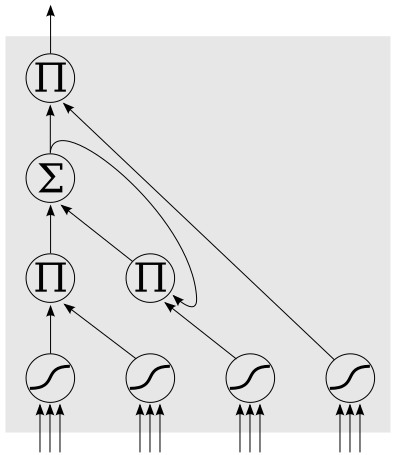

In [3]:
from IPython.display import Image
Image(filename='Lstm_block.png') 

"A typical implementation of an LSTM block is shown above. The four units shown at the bottom of the figure are sigmoid units ($y=s(\sum w_i x_i$), where s is some squashing function, such as the logistic function). The left-most of these units computes a value which is conditionally fed as an input value to the block's memory. The other three units serve as gates to determine when values are allowed to flow into or out of the block's memory. The second unit from the left (on the bottom row) is the "input gate". When it outputs a value close to zero, it zeros out the value from the left-most unit, effectively blocking that value from entering into the next layer. The second unit from the right is the "forget gate". When it outputs a value close to zero, the block will effectively forget whatever value it was remembering. The right-most unit (on the bottom row) is the "output gate". It determines when the unit should output the value in its memory. The units containing the $\Pi$ symbol compute the product of their inputs ($y=\Pi x_i$). These units have no weights. The unit with the $\Sigma$ symbol computes a linear function of its inputs ($y=\sum w_i x_i$.) The output of this unit is not squashed so that it can remember the same value for many time-steps without the value decaying. This value is fed back in so that the block can "remember" it (as long as the forget gate allows). Typically, this value is also fed into the 3 gating units to help them make gating decisions."

In [24]:
# Artificial Dataset - tell the difference between sine and cosine
X_1 = np.array([[np.sin(i + 0.01 * np.random.rand()) + 0.5 * np.random.rand() for i in xrange(10)] for j in range(100)])
y_1 = np.array([0 for i in range(100)])

X_2 = np.array([[np.cos(i + 0.01 * np.random.rand()) + 0.5 * np.random.rand() for i in xrange(10)] for j in range(100)])
y_2 = np.array([1 for i in range(100)])

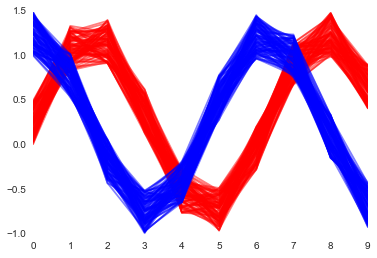

In [25]:
for x in X_1:
    plt.plot(x, color="red", alpha=0.5)
for x in X_2:
    plt.plot(x, color="blue", alpha=0.5)
plt.show()

In [35]:
X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2], axis=0)

In [40]:
model = Sequential()
model.add(LSTM(10, 128, activation='sigmoid', inner_activation='hard_sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(128, 1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop')

model.fit(X, y, batch_size=16, nb_epoch=10, validation_split=0.1)

Train on 180 samples, validate on 20 samples
Epoch 0


TypeError: ('Bad input argument to theano function with name "build/bdist.macosx-10.5-x86_64/egg/keras/models.py:64"  at index 0(0-based)', 'Wrong number of dimensions: expected 3, got 2 with shape (16, 10).')

In [39]:
y.shape

(200,)